In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to C:\Users\DHRUV
[nltk_data]     GUPTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\DHRUV
[nltk_data]     GUPTA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
print(df.shape)
df.info()

(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
for i in range(5):
  print("review",i)
  print(df['review'].iloc[i],"\n")
  print(df['sentiment'].iloc[i],"\n")

review 0
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

In [9]:
def length_of_review(review):
  words = review.split()
  word_count=len(words)
  return word_count

In [10]:
df['length_of_review']=df['review'].apply(length_of_review)

In [11]:
df.head()

,review,sentiment,length_of_review
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


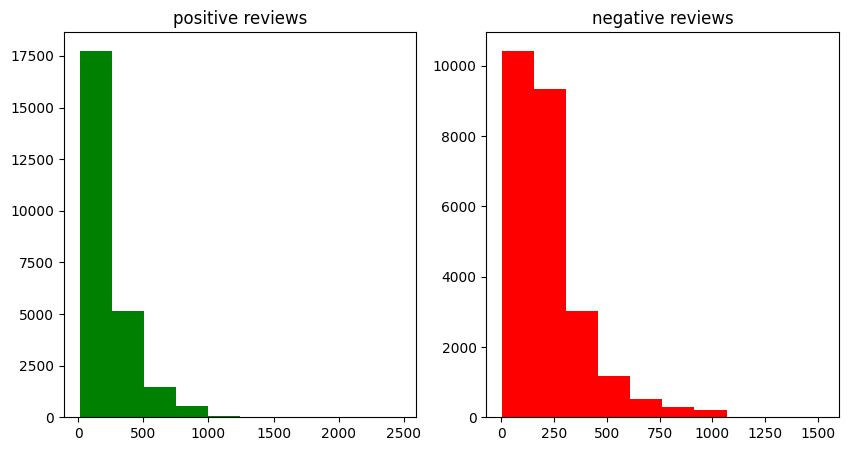

In [12]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(df[df['sentiment']=='positive']['length_of_review'],color='green')
ax[0].set_title('positive reviews')
ax[1].hist(df[df['sentiment']=='negative']['length_of_review'],color='red')
ax[1].set_title('negative reviews')
plt.show()

In [13]:
df.sentiment.replace({'positive':1,'negative':0},inplace=True)

C:\Users\DHRUV GUPTA\AppData\Local\Temp\ipykernel_14876\2774486204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sentiment.replace({'positive':1,'negative':0},inplace=True)
C:\Users\DHRUV GUPTA\AppData\Local\Temp\ipykernel_14876\2774486204.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

In [14]:
df.head()

,review,sentiment,length_of_review
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [15]:
from sys import flags
def data_filtering(review):
  review=review.lower()
  review=re.sub('<br />',' ',review)
  review=re.sub(r"htpps\S+|http\S+|www\S+",' ',review,flags=re.MULTILINE)
  review=re.sub(r"\@w+|\#",' ',review)
  review=re.sub(r"[^\w\s]"," ",review)
  review=word_tokenize(review)
  filter_review=[word for word in review if not word in stop_words]
  return " " .join(filter_review)

In [16]:
df['review'] = df['review'].astype(str)
df['review']=df['review'].apply(data_filtering)

In [17]:
for i in range(5):
  print("review",i)
  print(df['review'].iloc[i],"\n")
  print(df['sentiment'].iloc[i],"\n")

review 0
one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack st

In [19]:
df.head()

,review,sentiment,length_of_review
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically family little boy jake thinks zombie...,0,138
4,petter mattei love time money visually stunnin...,1,230


In [20]:
duplicate_reviews=df.duplicated().sum()
print(duplicate_reviews)

421


In [21]:
df=df.drop_duplicates('review')

In [22]:
df.head()

,review,sentiment,length_of_review
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically family little boy jake thinks zombie...,0,138
4,petter mattei love time money visually stunnin...,1,230


In [23]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [24]:
df.review=df['review'].apply(lambda x:stemming(x))

In [25]:
df.head()

,review,sentiment,length_of_review
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically family little boy jake thinks zombie...,0,138
4,petter mattei love time money visually stunnin...,1,230


In [26]:
df['length_of_review']=df['review'].apply(length_of_review)
df.head()

,review,sentiment,length_of_review
0,one reviewers mentioned watching 1 oz episode ...,1,163
1,wonderful little production filming technique ...,1,86
2,thought wonderful way spend time hot summer we...,1,85
3,basically family little boy jake thinks zombie...,0,66
4,petter mattei love time money visually stunnin...,1,125


In [27]:
positive_reviews=df[df['sentiment']==1]
negative_reviews=df[df['sentiment']==0]

In [28]:
positive_reviews.head()

,review,sentiment,length_of_review
0,one reviewers mentioned watching 1 oz episode ...,1,163
1,wonderful little production filming technique ...,1,86
2,thought wonderful way spend time hot summer we...,1,85
4,petter mattei love time money visually stunnin...,1,125
5,probably time favorite movie story selflessnes...,1,56


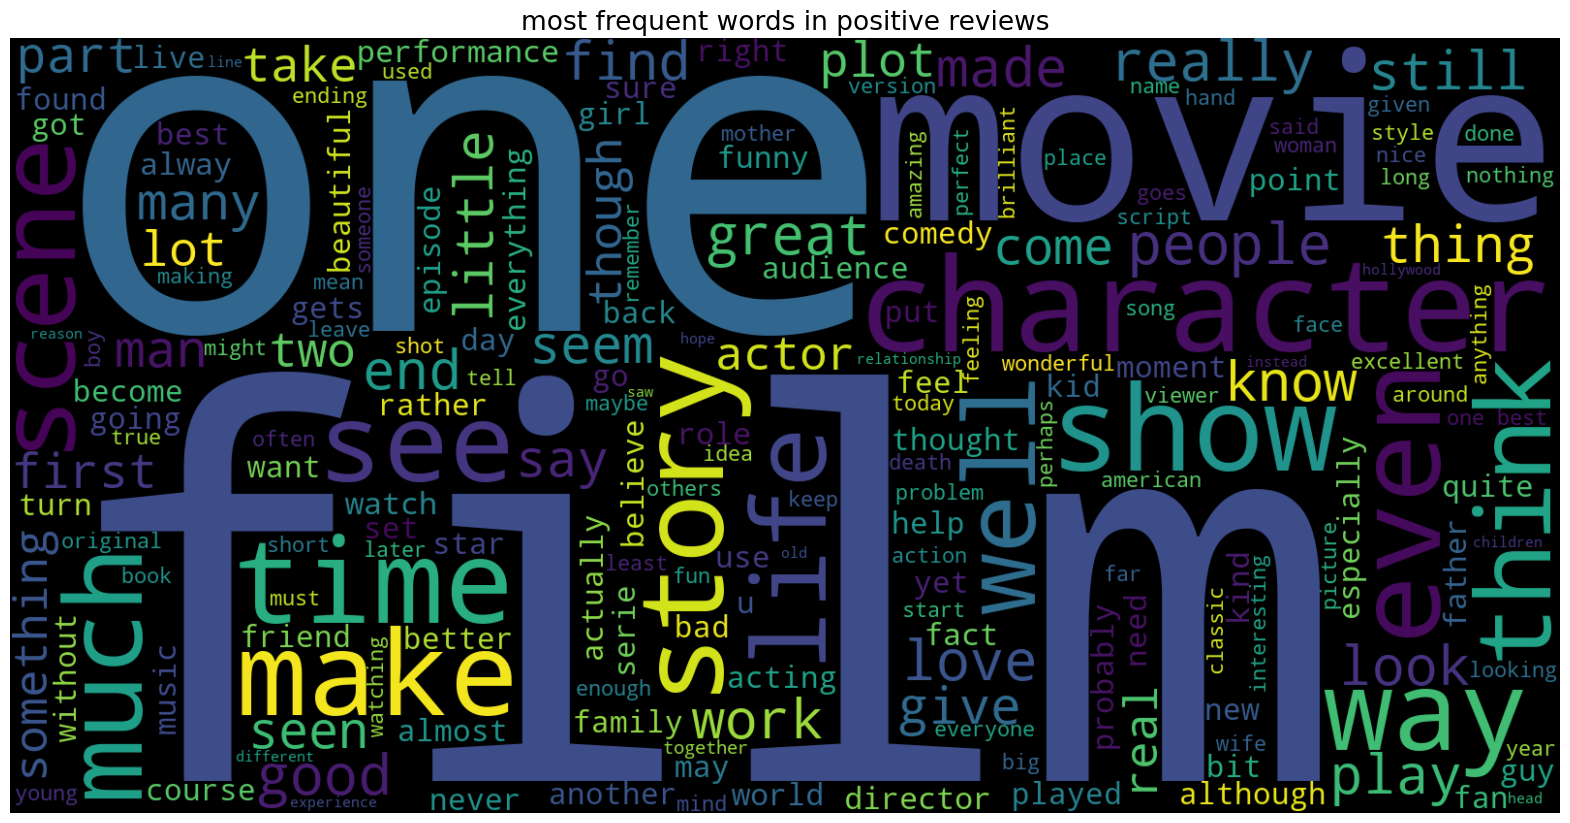

In [30]:
positive_reviews_text = ' '.join(word for word in positive_reviews['review'])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(width=1600,height=800).generate(positive_reviews_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('most frequent words in positive reviews' , fontsize=19)
plt.show()

In [31]:
from collections import Counter
count = Counter()
for text in positive_reviews['review'].values: 
    for word in text.split():
        count[word] += 1
count.most_common(20)

[('film', 41962),
 ('movie', 37652),
 ('one', 27207),
 ('like', 17650),
 ('good', 14959),
 ('story', 12896),
 ('great', 12885),
 ('time', 12699),
 ('well', 12680),
 ('see', 12224),
 ('also', 10760),
 ('really', 10703),
 ('would', 10547),
 ('even', 9570),
 ('first', 9183),
 ('much', 9175),
 ('people', 8685),
 ('love', 8657),
 ('best', 8478),
 ('get', 8251)]

In [32]:
df_positive_reviews=pd.DataFrame(count.most_common(20),columns=['words','count'])
df_positive_reviews.head()

,words,count
0,film,41962
1,movie,37652
2,one,27207
3,like,17650
4,good,14959


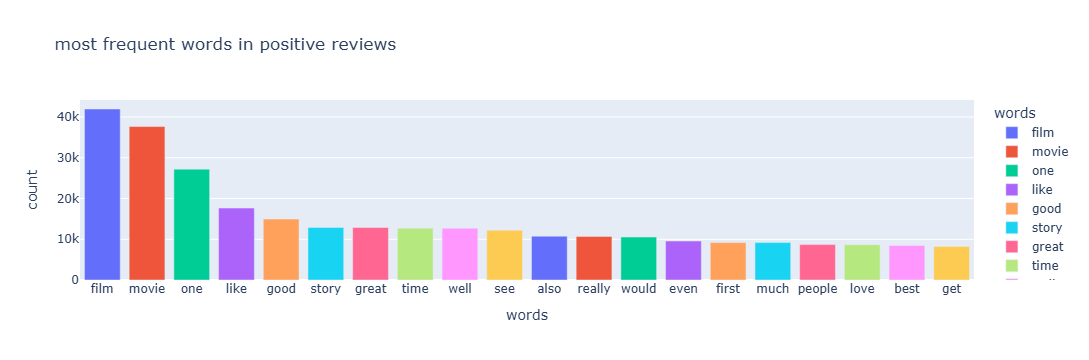

In [33]:
import plotly.express as px
px.bar(df_positive_reviews,x='words',y='count',title='most frequent words in positive reviews',color='words')

In [34]:
negative_reviews.head()

,review,sentiment,length_of_review
3,basically family little boy jake thinks zombie...,0,66
7,show amazing fresh innovative idea 70 first ai...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,50
11,saw movie 12 came recall scariest scene big bi...,0,84


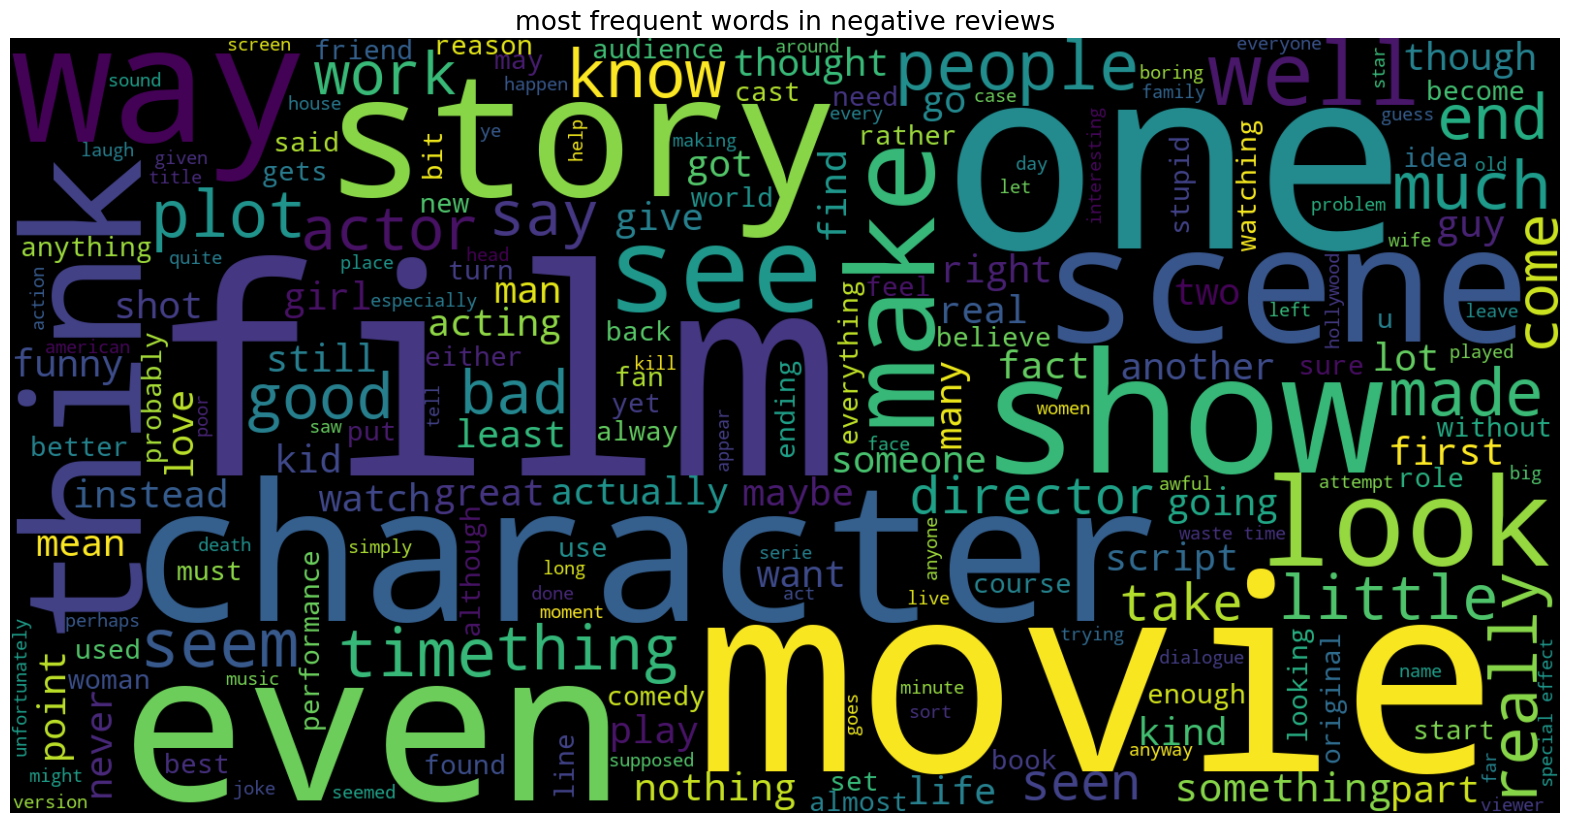

In [35]:
negative_word=' '.join(word for word in negative_reviews['review'])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(width=1600,height=800).generate(negative_word)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('most frequent words in negative reviews' , fontsize=19)
plt.show()

In [36]:
from collections import Counter
count = Counter()
for text in negative_reviews['review'].values:
  for word in text.split():
    count[word] += 1
count.most_common(20)

[('movie', 49605),
 ('film', 37178),
 ('one', 25990),
 ('like', 22190),
 ('even', 15092),
 ('good', 14578),
 ('bad', 14559),
 ('would', 13853),
 ('really', 12217),
 ('time', 12204),
 ('see', 10596),
 ('story', 10072),
 ('get', 10021),
 ('much', 9974),
 ('people', 9336),
 ('make', 9262),
 ('could', 9184),
 ('made', 8706),
 ('well', 8424),
 ('first', 8246)]

In [37]:
df_negative_reviews=pd.DataFrame(count.most_common(20),columns=['words','count'])
df_negative_reviews.head()

,words,count
0,movie,49605
1,film,37178
2,one,25990
3,like,22190
4,even,15092


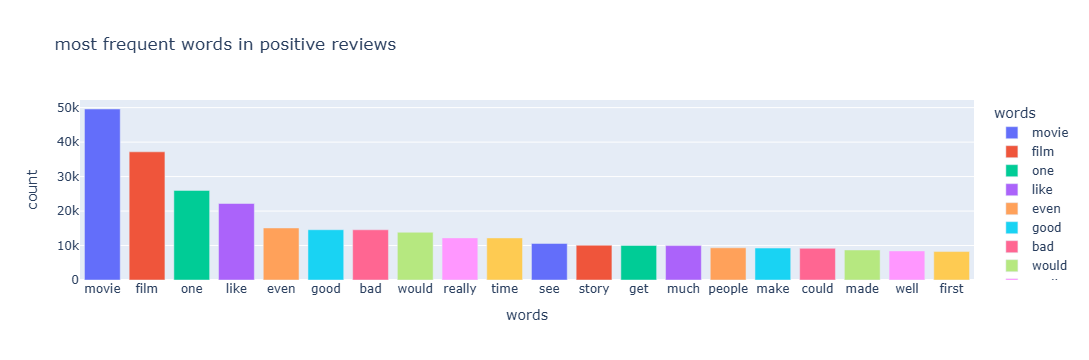

In [38]:
px.bar(df_negative_reviews,x='words',y='count',title='most frequent words in positive reviews',color='words')

In [39]:
X=df['review']
y=df['sentiment']

In [40]:
vect=TfidfVectorizer()
X=vect.fit_transform(X)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
print("size of x_train",x_train.shape)
print("size of x_test",x_test.shape)
print("size of y_train",y_train.shape)
print("size of y_test",y_test.shape)

size of x_train (34701, 101518)
size of x_test (14873, 101518)
size of y_train (34701,)
size of y_test (14873,)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [44]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_logreg=logreg.predict(x_test) 
logreg_acc=accuracy_score(y_test,y_pred_logreg)
print("accuracy of logistic regression: {:.2f}%".format(logreg_acc*100))

accuracy of logistic regression: 89.30%


In [45]:
print (confusion_matrix(y_test,y_pred_logreg))
print("\n")
print (classification_report(y_test,y_pred_logreg))

[[6547  923]
 [ 668 6735]]


              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7470
           1       0.88      0.91      0.89      7403

    accuracy                           0.89     14873
   macro avg       0.89      0.89      0.89     14873
weighted avg       0.89      0.89      0.89     14873



In [46]:
MNB= MultinomialNB()
MNB.fit(x_train,y_train)
y_pred_MNB=MNB.predict(x_test) 
MNB_acc=accuracy_score(y_test,y_pred_MNB)
print("accuracy of naive bayes: {:.2f}%".format(MNB_acc*100))

accuracy of naive bayes: 86.47%


In [47]:
print (confusion_matrix(y_test,y_pred_MNB))
print("\n")
print (classification_report(y_test,y_pred_MNB))

[[6467 1003]
 [1010 6393]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.87      7470
           1       0.86      0.86      0.86      7403

    accuracy                           0.86     14873
   macro avg       0.86      0.86      0.86     14873
weighted avg       0.86      0.86      0.86     14873



In [48]:
SVC = LinearSVC()
SVC.fit(x_train,y_train)
y_pred_SVC=SVC.predict(x_test) 
SVC_acc=accuracy_score(y_test,y_pred_SVC)
print("accuracy of linear SVC: {:.2f}%".format(SVC_acc*100))

accuracy of linear SVC: 89.39%


In [50]:
print (confusion_matrix(y_test,y_pred_SVC))
print("\n")
print (classification_report(y_test,y_pred_SVC))

[[6607  863]
 [ 715 6688]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7470
           1       0.89      0.90      0.89      7403

    accuracy                           0.89     14873
   macro avg       0.89      0.89      0.89     14873
weighted avg       0.89      0.89      0.89     14873



In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],'loss':['hinge','squared_hinge']}
grid = GridSearchCV(SVC, param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.879 total time=   0.2s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.884 total time=   0.1s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.877 total time=   0.1s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.870 total time=   0.1s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.876 total time=   0.1s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.3s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.896 total time=   0.3s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.2s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.2s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.2s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.892 total time=   0.6s
[CV 2/5] END ...................C=1, loss=hinge;

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [52]:
print("best paramerters:",grid.best_params_)
print("best cross vailidation score : {:.2f}".format(grid.best_score_))

best paramerters: {'C': 1, 'loss': 'hinge'}
best cross vailidation score : 0.89


In [53]:
SVC = LinearSVC(C=1,loss='hinge')
SVC.fit(x_train,y_train)
y_pred_SVC=SVC.predict(x_test) 
SVC_acc=accuracy_score(y_test,y_pred_SVC)
print("accuracy of Tuned linear SVC: {:.2f}%".format(SVC_acc*100))

accuracy of Tuned linear SVC: 89.77%


In [54]:
print (confusion_matrix(y_test,y_pred_SVC))
print("\n")
print (classification_report(y_test,y_pred_SVC))

[[6640  830]
 [ 692 6711]]


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7470
           1       0.89      0.91      0.90      7403

    accuracy                           0.90     14873
   macro avg       0.90      0.90      0.90     14873
weighted avg       0.90      0.90      0.90     14873



In [55]:
import pickle as pk
pk.dump(SVC, open('SVC.pkl', 'wb'))

In [57]:
pk.dump(vect, open('vectorizer.pkl', 'wb'))